In [94]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [95]:
bank_df = pd.read_csv('MLProjects/Bank Churn Prediction/archive/Churn_Modelling.csv')

In [96]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
bank_df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace = True)

In [98]:
bank_df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
bank_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [100]:
bank_df.replace({'Female' : 1 ,'Male' : 0} , inplace = True)

In [101]:
bank_df.Gender.unique()

array([1, 0])

In [102]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [103]:
 bank_df = (pd.get_dummies(data = bank_df , columns = ['Geography'])).astype(int)

In [104]:
 bank_df.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1


In [105]:
bank_df.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary      int64
Exited               int64
Geography_France     int64
Geography_Germany    int64
Geography_Spain      int64
dtype: object

In [106]:
X = bank_df.drop(columns = ['Exited'])
y = bank_df['Exited']

In [107]:
X.shape

(10000, 12)

In [108]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [109]:
y.shape

(10000,)

In [110]:
!pip install imbalanced-learn

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X,y = smote.fit_resample(X , y)

In [112]:
X.shape

(15926, 12)

In [113]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [114]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X[:] = Scaler.fit_transform(X)

In [115]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1


In [116]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 , random_state = 42)

In [117]:
X_train.shape

(12740, 12)

In [118]:
X_test.shape

(3186, 12)

In [119]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10 ,activation ='relu'),
    keras.layers.Dense(5 ,activation ='relu'),
    keras.layers.Dense(1 , activation ='sigmoid')
          ])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train , y_train , epochs =100 , batch_size=50)


Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5456 - loss: 0.6856
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6714 - loss: 0.5968
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7397 - loss: 0.5210
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.4886
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7826 - loss: 0.4571
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7856 - loss: 0.4457
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4388
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8046 - loss: 0.4277
Epoch 9/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8098 - loss: 0.4213
Epoch 10/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8081 - loss: 0.4125
Epoch 11/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4082
Epoch 12/100
255/255 ━━━━━━━━━━━━━━━━━━━━

In [120]:
loss , accuracy = model.evaluate(X_test, y_test)
accuracy*100

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 0.4104


83.74136686325073

In [121]:
y_test[10:15]

2323     0
8663     0
2099     0
12267    1
4995     0
Name: Exited, dtype: int64

In [122]:
pred = model.predict(X_test)
binary_pred = (pred > 0.5).astype(int)
binary_pred[10:15]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1],
       [1],
       [0],
       [1],
       [0]])

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test , binary_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1633
           1       0.79      0.90      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [125]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test , binary_pred ,normalize = 'true')

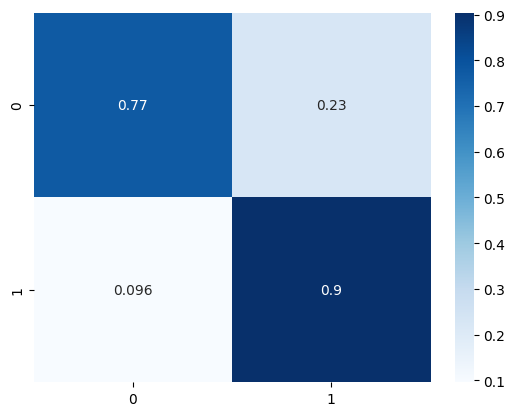

In [126]:
import seaborn as sns
sns.heatmap(cf,cmap = 'Blues',annot = True);